In [154]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [155]:
data = pd.read_csv('Wave7.csv')
data.head()

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,S007,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_REGION_NUTS2,N_REG_NUTS1,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,L_INTERVIEWER_NUMBER,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,S025,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_AFRICANUNION,Q82_APEC,Q82_ARABLEAGUE,Q82_ASEAN,Q82_CIS,Q82_CUSMA,Q82_ECO,Q82_EU,Q82_GULFCOOP,Q82_ISLCOOP,Q82_MERCOSUR,Q82_NAFTA,Q82_OAS,Q82_SAARC,Q82_SCO,Q82_TLC,Q82_UNDP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q94R,Q95,Q95R,Q96,Q96R,Q97,Q97R,Q98,Q98R,Q99,Q99R,Q100,Q100R,Q101,Q101R,Q102,Q102R,Q103,Q103R,Q104,Q104R,Q105,Q105R,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q172R,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,V002,Q265,V001,Q266,X002_02B,Q267,V002A_01,Q268,V001A_01,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275A,Q275R,Q276,Q276A,Q276R,Q277,Q277A,Q277R,Q278,Q278A,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Q291G1,Q291G2,Q291G3,Q291G4,Q291G5,Q291G6,Q291P1,Q291P2,Q291P3,Q291P4,Q291P5,Q291P6,Q291UN1,Q291UN2,Q291UN3,Q291UN4,Q291UN5,Q291UN6,Q292A,Q292B,Q292C,Q292D,Q292E,Q292F,Q292G,Q292H,Q292I,Q292J,Q292K,Q292L,Q292M,Q292N,Q292O,Q293,Q294A,Q294B,Y001,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,RESEMAVALWGT,fhregion,polregfh,freestfh,prfhrat,prfhscore,clfhrat,clfhscore,democ,autoc,polity,durable,regtype,ruleoflaw,corrupttransp,electintegr,btiregion,btistatus,btidemstatus,btistate,btipolpart,btiruleoflaw,btistability,btiintegration,btimarket,btigovindex,btigoveperform,btiregime,regionWB,incomeWB,landWB,GDPpercap1,GDPpercap2,giniWB,incrichest10p,popWB1990,popWB2000,popWB2019,lifeexpect,popgrowth,urbanpop,laborforce,deathrate,unemployfem,unemploymale,unemploytotal,accessclfuel,accesselectr,renewelectr,co2emis,co2percap,easeofbusiness,militaryexp,Trade,healthexp,educationexp,medageun,meanschooling,educationHDI,compulseduc,GII,DGI,womenparl,hdi,incomeindexHDI,humanineqiality,lifeexpectHDI,homiciderate,Refugeesorigin,internetusers,mobphone,migrationrate,schoolgpi,femchoutsch,choutsch,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2xel_frefair,v2xcl_rol,v2x_cspart,v2xeg_eqdr,v2excrptps,v2exthftps,v2juaccnt,v2cltrnslw,v2clacjust,v2clsocgrp,v2clacfree,v2clrelig,v2csrlgrep,v2mecenefm,v2mecenefi,v2mebias,v2pepwrses,v2pepwrgen,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2clgencl,v2peasjgen,v2peasbgen,v2cafres,v2cafexch,v2x_corr,v2x_gender,v2x_gencl,v2x_genpp,v2x_rul

In [156]:
data.columns

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=613)

In [157]:
data.shape

(97220, 613)

In [158]:
# countries = data[(data['B_COUNTRY_ALPHA'] == 'IND') | (data['B_COUNTRY_ALPHA'] == 'USA') | (data['B_COUNTRY_ALPHA'] == 'DEU')]

data[(data['B_COUNTRY_ALPHA'] == 'USA') | (data['B_COUNTRY_ALPHA'] == 'IND')].shape

(4288, 613)

In [159]:
usa = data[(data['B_COUNTRY_ALPHA'] == 'USA')]
usa.reset_index(drop = True, inplace = True)

cat_cols = list(set(usa.columns)-{'Y001','Y002','Y003','SACSECVAL', 'RESEMAVAL','I_AUTHORITY',  'I_NATIONALISM',  'I_DEVOUT',  'DEFIANCE',  'I_RELIGIMP',  'I_RELIGBEL',  'I_RELIGPRAC',  'DISBELIEF',  'I_NORM1',  'I_NORM2',  'I_NORM3',  'RELATIVISM',  'I_TRUSTARMY',  'I_TRUSTPOLICE',  'I_TRUSTCOURTS',  'SCEPTICISM',  'I_INDEP',  'I_IMAGIN',  'I_NONOBED',  'AUTONOMY',  'I_WOMJOB',  'I_WOMPOL',  'I_WOMEDU',  'EQUALITY',  'I_HOMOLIB',  'I_ABORTLIB',  'I_DIVORLIB',  'CHOICE',  'I_VOICE1',  'I_VOICE2',  'I_VOI2_00',  'VOICE',  'SECVALWGT',  'RESEMAVALWGT'})
usa[cat_cols] = usa[cat_cols].astype('category')

pd.options.display.max_columns = None

required_cols = ['B_COUNTRY_ALPHA','Q222','Q221','Q48','Q49','Q50','Q260','Q262','Q263','Q274','Q288','Q275','Q164','Q172R','Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']
usa = usa[required_cols]

ethical_values = ['Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']

# reverse the score for columns such that in the end 1 is bad and 10 is good
reverse_scoring = ['Q177','Q178','Q179','Q180','Q181','Q183','Q187','Q188','Q189','Q190','Q191','Q192','Q194','Q195']

for col in ethical_values:
    usa[col] = pd.to_numeric(usa[col], errors='coerce')  # Convert to numeric, NaNs for invalid
    usa[col] = usa[col].where(usa[col] >= 0, np.nan)  # Replace negative values with NaN

for col in reverse_scoring:
    usa[col] = 11 - usa[col]

# Ethics score is the average score of all questions
usa['ethics_score'] = usa[ethical_values].mean(axis=1)

# Normalized ethics score
min_score = usa['ethics_score'].min()
max_score = usa['ethics_score'].max()
usa['ethics_score'] = 10 * (usa['ethics_score'] - min_score) / (max_score - min_score)

# fill null values with mean
usa['ethics_score'].fillna(usa['ethics_score'].mean(), inplace=True)

usa.drop(columns=ethical_values, inplace=True)

usa.rename(columns={
    'Q262':'age', 
    'Q263':'immigrant', 
    'Q274':'children', 
    'Q275':'education', 
    'Q260':'sex', 
    'Q222':'voter_national',
    'Q221':'voter_local',
    'Q164':'god_importance',
    'Q172R':'praying_frequency',
    'Q48':'freedom',
    'Q49':'satisfaction',
    'Q50':'financial_wellbeing',
    'Q288':'income_level',
    'B_COUNTRY_ALPHA':'country'
    }, inplace=True)

# For each respondent:
#     IF voter_national == 4 OR voter_local == 4 THEN
#         target = 0  # Not allowed to vote
#     ELSE:
#         IF voter_national == 1 OR voter_local == 1 THEN
#             target = 3  # Always votes (high engagement)
#         ELSE IF voter_national == 2 OR voter_local == 2 THEN
#             IF voter_national == 3 OR voter_local == 3 THEN
#                 target = 1  # Sometimes votes but inconsistent
#             ELSE:
#                 target = 2  # Usually votes
#         ELSE:
#             target = 1  # Never votes (low engagement)
usa['voter'] = -1
for i in range(len(usa)):
    national = usa.loc[i, 'voter_national']
    local = usa.loc[i, 'voter_local']

    if national == 4 | local == 4:
        usa.loc[i, 'voter'] = 0
    elif national == 1 | local == 1:
        usa.loc[i, 'voter'] = 3
    elif national == 2 | local == 2:
        if national == 3 | local == 3:
            usa.loc[i, 'voter'] = 1
        else:
            usa.loc[i, 'voter'] = 2
    else:
        usa.loc[i, 'voter'] = 1
# usa['voter'] = np.where(usa['voter_national'].isin([4]) | usa['voter_local'].isin([4]),0,np.where(usa['voter_national'].isin([1,2]) | usa['voter_local'].isin([1,2]),1,0))

usa.drop(columns=['voter_national','voter_local'], inplace=True)

to_clean = ['freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 'children', 'income_level', 'education', 'god_importance', 'praying_frequency']
for col in to_clean:
    usa[col] = np.where(usa[col].astype(int) >= 0, usa[col], None)

# fill missing values
usa['immigrant'].fillna(1, inplace=True)
usa['children'].fillna(0, inplace=True)
usa['education'].fillna(usa['education'].median(), inplace=True)
usa['income_level'].fillna(usa['income_level'].median(), inplace=True)
usa['financial_wellbeing'].fillna(usa['financial_wellbeing'].median(), inplace=True)
usa['satisfaction'].fillna(usa['satisfaction'].median(), inplace=True)
usa['praying_frequency'].fillna(usa['praying_frequency'].median(), inplace=True)
usa['god_importance'].fillna(usa['god_importance'].median(), inplace=True)
usa['freedom'].fillna(usa['freedom'].median(), inplace=True)

usa['sex'] = np.where(usa['sex'] == 1, 'Male', 'Female')
usa['immigrant'] = np.where(usa['immigrant'] == 1, 'Not immigrant', 'Immigrant')

# Set datatypes

usa[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']] = usa[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']].astype('int')
usa[['income_level', 'education', 'praying_frequency', 'voter']] = usa[['income_level', 'education', 'praying_frequency', 'voter']].astype('int')
usa[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']] = usa[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']].astype('category')
usa['country'] = usa['country'].astype('str')
usa['ethics_score'] = usa['ethics_score'].astype('float').apply(lambda x: round(x, 2))

# usa.to_csv('cleaned_dataset.csv')

usa.head()


,country,freedom,satisfaction,financial_wellbeing,sex,age,immigrant,children,income_level,education,god_importance,praying_frequency,ethics_score,voter
0,USA,7,4,2,Female,43,Not immigrant,6,3,4,10,1,7.26,1
1,USA,6,10,5,Female,35,Not immigrant,5,5,2,3,1,6.84,1
2,USA,10,10,10,Female,48,Not immigrant,2,1,3,10,1,9.12,1
3,USA,10,8,7,Female,49,Not immigrant,3,1,3,10,1,7.71,1
4,USA,4,7,5,Female,20,Not immigrant,0,5,3,10,2,7.96,1


In [160]:
ind = data[(data['B_COUNTRY_ALPHA'] == 'IND')]
ind.reset_index(drop = True, inplace = True)

cat_cols = list(set(ind.columns)-{'Y001','Y002','Y003','SACSECVAL', 'RESEMAVAL','I_AUTHORITY',  'I_NATIONALISM',  'I_DEVOUT',  'DEFIANCE',  'I_RELIGIMP',  'I_RELIGBEL',  'I_RELIGPRAC',  'DISBELIEF',  'I_NORM1',  'I_NORM2',  'I_NORM3',  'RELATIVISM',  'I_TRUSTARMY',  'I_TRUSTPOLICE',  'I_TRUSTCOURTS',  'SCEPTICISM',  'I_INDEP',  'I_IMAGIN',  'I_NONOBED',  'AUTONOMY',  'I_WOMJOB',  'I_WOMPOL',  'I_WOMEDU',  'EQUALITY',  'I_HOMOLIB',  'I_ABORTLIB',  'I_DIVORLIB',  'CHOICE',  'I_VOICE1',  'I_VOICE2',  'I_VOI2_00',  'VOICE',  'SECVALWGT',  'RESEMAVALWGT'})
ind[cat_cols] = ind[cat_cols].astype('category')

pd.options.display.max_columns = None


required_cols = ['B_COUNTRY_ALPHA','Q222','Q221','Q48','Q49','Q50','Q260','Q262','Q263','Q274','Q288','Q275','Q164','Q172R','Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']
ind = ind[required_cols]

ethical_values = ['Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']

# reverse the score for columns such that in the end 1 is bad and 10 is good
reverse_scoring = ['Q177','Q178','Q179','Q180','Q181','Q183','Q187','Q188','Q189','Q190','Q191','Q192','Q194','Q195']

for col in ethical_values:
    ind[col] = pd.to_numeric(ind[col], errors='coerce')  # Convert to numeric, NaNs for invalid
    ind[col] = ind[col].where(ind[col] >= 0, np.nan)  # Replace negative values with NaN

for col in reverse_scoring:
    ind[col] = 11 - ind[col]

# Ethics score is the average score of all questions
ind['ethics_score'] = ind[ethical_values].mean(axis=1)

# Normalized ethics score
min_score = ind['ethics_score'].min()
max_score = ind['ethics_score'].max()
ind['ethics_score'] = 10 * (ind['ethics_score'] - min_score) / (max_score - min_score)

# fill null values with mean
ind['ethics_score'].fillna(ind['ethics_score'].mean(), inplace=True)

ind.drop(columns=ethical_values, inplace=True)

ind.rename(columns={
    'Q262':'age', 
    'Q263':'immigrant', 
    'Q274':'children', 
    'Q275':'education', 
    'Q260':'sex', 
    'Q222':'voter_national',
    'Q221':'voter_local',
    'Q164':'god_importance',
    'Q172R':'praying_frequency',
    'Q48':'freedom',
    'Q49':'satisfaction',
    'Q50':'financial_wellbeing',
    'Q288':'income_level',
    'B_COUNTRY_ALPHA':'country'
    }, inplace=True)

ind['voter'] = -1
for i in range(len(ind)):
    national = ind.loc[i, 'voter_national']
    local = ind.loc[i, 'voter_local']

    if national == 4 | local == 4:
        ind.loc[i, 'voter'] = 0
    elif national == 1 | local == 1:
        ind.loc[i, 'voter'] = 3
    elif national == 2 | local == 2:
        if national == 3 | local == 3:
            ind.loc[i, 'voter'] = 1
        else:
            ind.loc[i, 'voter'] = 2
    else:
        ind.loc[i, 'voter'] = 1

# Always / Usually = 1, Rest = 0
# ind['voter'] = np.where(ind['voter_national'].isin([4]) | ind['voter_local'].isin([4]),0,np.where(ind['voter_national'].isin([1,2]) | ind['voter_local'].isin([1,2]),1,0))
ind.drop(columns=['voter_national','voter_local'], inplace=True)

to_clean = ['freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 'children', 'income_level', 'education', 'god_importance', 'praying_frequency']
for col in to_clean:
    ind[col] = np.where(ind[col].astype(int) >= 0, ind[col], None)

# fill missing values
ind['immigrant'].fillna(1, inplace=True)
ind['children'].fillna(0, inplace=True)
ind['education'].fillna(ind['education'].median(), inplace=True)
ind['income_level'].fillna(ind['income_level'].median(), inplace=True)
ind['financial_wellbeing'].fillna(ind['financial_wellbeing'].median(), inplace=True)
ind['satisfaction'].fillna(ind['satisfaction'].median(), inplace=True)
ind['praying_frequency'].fillna(ind['praying_frequency'].median(), inplace=True)
ind['god_importance'].fillna(ind['god_importance'].median(), inplace=True)
ind['freedom'].fillna(ind['freedom'].median(), inplace=True)

ind['sex'] = np.where(ind['sex'] == 1, 'Male', 'Female')
ind['immigrant'] = np.where(ind['immigrant'] == 1, 'Not immigrant', 'Immigrant')

# Set datatypes

ind[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']] = ind[['freedom','satisfaction','financial_wellbeing','god_importance', 'age', 'children']].astype('int')
ind[['income_level', 'education', 'praying_frequency', 'voter']] = ind[['income_level', 'education', 'praying_frequency', 'voter']].astype('int')
ind[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']] = ind[['immigrant', 'sex', 'income_level', 'education', 'praying_frequency', 'voter']].astype('category')
ind['country'] = ind['country'].astype('str')
ind['ethics_score'] = ind['ethics_score'].astype('float').apply(lambda x: round(x, 2))

# ind.to_csv('cleaned_dataset.csv')

ind.head()

,country,freedom,satisfaction,financial_wellbeing,sex,age,immigrant,children,income_level,education,god_importance,praying_frequency,ethics_score,voter
0,IND,6,4,5,Female,20,Not immigrant,0,4,6,8,1,6.88,3
1,IND,9,6,6,Male,63,Not immigrant,3,5,3,10,1,6.48,1
2,IND,10,10,10,Male,17,Not immigrant,0,1,1,1,1,5.68,3
3,IND,7,5,6,Female,68,Not immigrant,4,7,0,10,1,4.00,3
4,IND,10,7,4,Male,55,Not immigrant,1,4,6,10,1,5.44,3


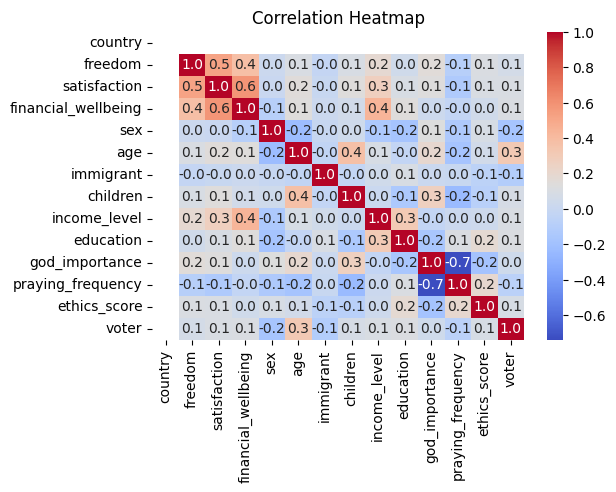

In [163]:
cleaned_dataset = pd.concat([ind,usa])
cleaned_dataset.reset_index(inplace=True, drop=True)

cleaned_dataset_numeric = cleaned_dataset.copy(deep=True)
cleaned_dataset_numeric['country'] = np.where(cleaned_dataset_numeric['country'] == 'IND', 0, 1)
cleaned_dataset_numeric['sex'] = np.where(cleaned_dataset_numeric['sex'] == 'Female', 1, 0)
cleaned_dataset_numeric['immigrant'] = np.where(cleaned_dataset_numeric['immigrant'] == 'Not immigrant', 0, 1)
cleaned_dataset_numeric = cleaned_dataset_numeric[cleaned_dataset_numeric['country'] == 1]
# ind = cleaned_dataset_numeric[cleaned_dataset_numeric['country'] == 0]
# usa = cleaned_dataset_numeric[cleaned_dataset_numeric['country'] == 1]

corr_matrix = cleaned_dataset_numeric.corr(method='spearman')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

financial well being vs income level: 0.4   
satisfaction vs freedom: 0.4   
financial well being vs freedom: 0.4  
financial well being vs satisfaction: 0.5  

Remove financial well being, freedom

In [164]:
cleaned_dataset.drop(columns=['financial_wellbeing','freedom'], inplace=True)
cleaned_dataset.head(3)

,country,satisfaction,sex,age,immigrant,children,income_level,education,god_importance,praying_frequency,ethics_score,voter
0,IND,4,Female,20,Not immigrant,0,4,6,8,1,6.88,3
1,IND,6,Male,63,Not immigrant,3,5,3,10,1,6.48,1
2,IND,10,Male,17,Not immigrant,0,1,1,1,1,5.68,3


In [165]:
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)

In [130]:
# import matplotlib.pyplot as plt

# # Calculate the percentage of null values for each column
# null_percentages = ind.isna().mean() * 100

# # Plot the percentages
# plt.figure(figsize=(10, 6))
# null_percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('Percentage of Null Values in Each Column', fontsize=14)
# plt.xlabel('Columns', fontsize=12)
# plt.ylabel('Percentage of Nulls (%)', fontsize=12)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [131]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Columns to analyze for null-voter split
# columns_to_check = [
#     'freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 
#     'children', 'education', 'income_level', 'god_importance', 
#     'praying_frequency'
# ]

# # Generate plots for each column
# for col in columns_to_check:
#     plt.figure(figsize=(8, 5))
    
#     # Create a DataFrame of rows with missing values in the current column
#     missing_data = ind[ind[col].isna()]
    
#     # Count voter types in rows with missing values
#     voter_counts = missing_data['voter'].value_counts(normalize=True) * 100
    
#     # Create a bar plot
#     sns.barplot(x=voter_counts.index, y=voter_counts.values, palette='viridis')
#     plt.title(f'Voter Split for Missing Values in {col}', fontsize=14)
#     plt.xlabel('Voter', fontsize=12)
#     plt.ylabel('Percentage (%)', fontsize=12)
#     plt.ylim(0, 100)
#     plt.tight_layout()
#     plt.show()

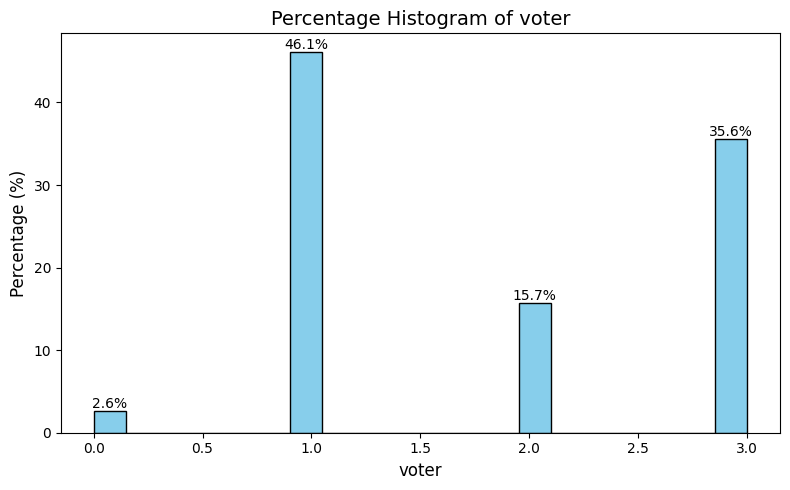

In [143]:
# # Exclude 'D_INTERVIEW' and plot histograms for all other columns with percentages and data labels
# columns_to_plot = [col for col in usa.columns if col == 'voter']

# # Plot histograms
# for col in columns_to_plot:
#     plt.figure(figsize=(8, 5))
    
#     # Prepare data and weights
#     data = usa[col].dropna()
#     weights = (np.ones_like(data) / len(data)) * 100  # Calculate weights for percentage
    
#     # Plot the histogram
#     counts, bins, patches = plt.hist(data, bins=20, color='skyblue', edgecolor='black', weights=weights)
    
#     # Add data labels
#     for count, patch in zip(counts, patches):
#         if count > 0:  # Show label only for non-zero bins
#             plt.text(patch.get_x() + patch.get_width() / 2, count, f'{count:.1f}%', 
#                      ha='center', va='bottom', fontsize=10)
    
#     # Customize the plot
#     plt.title(f'Percentage Histogram of {col}', fontsize=14)
#     plt.xlabel(col, fontsize=12)
#     plt.ylabel('Percentage (%)', fontsize=12)
#     plt.tight_layout()
#     plt.show()

In [133]:
# Removing technical & redundant columns
# 'Q152','Q153','Q154','Q155','Q156','Q157',
# countries.drop(
#     columns=['version','doi','A_WAVE','A_STUDY','A_YEAR','B_COUNTRY', 'X003R', 'B_COUNTRY_ALPHA', 'C_COW_NUM','C_COW_ALPHA','Q_MODE','S007','N_REGION_ISO','N_TOWN','N_REGION_NUTS2','N_REG_NUTS1','J_INTDATE','FW_START','FW_END','K_TIME_START','K_TIME_END','G_TOWNSIZE','I_PSU','S_INTLANGUAGE','Q33','Q34','Q35','Partyname','O1_LONGITUDE','O2_LATITUDE'],
#     inplace = True
# )

# Removing columns with no distinct data
# distinct = pd.DataFrame({
#     'column_name': countries.columns,
#     'distinct_values': [countries[col].nunique() for col in countries.columns]
# })
# distinct = distinct[~(distinct['column_name'] == 'B_COUNTRY_ALPHA')]
# countries.drop(
#     columns = list(distinct[(distinct['distinct_values'] == 1) | (distinct['distinct_values'] == 0)]['column_name']),
#     inplace = True
# )

# Removing columns with only null values
# countries.drop(
#     columns = countries.columns[countries.isnull().all()].tolist(),
#     inplace = True
# )

# # Set threshold for columns with missing values
# missing_percentage_df = pd.DataFrame(countries.isnull().mean() * 100, columns=['Missing_Percentage']).reset_index()
# missing_percentage_df.rename(columns={'index': 'Column'}, inplace=True)
# missing_percentage_df = missing_percentage_df.sort_values(by='Missing_Percentage', ascending=False)

# countries.drop(columns = list(missing_percentage_df[missing_percentage_df['Missing_Percentage'] >= 10]['Column'].unique()), inplace=True)


# Replace missing values with NaN
# cols = list(set(countries.columns)-{'N_REGION_ISO','N_TOWN'})
# countries[cols] = countries[cols].replace([-1, -2, -3, -4, -5], np.nan)